<a href="https://colab.research.google.com/github/adi-bl/NLP-project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries:

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras import layers
import keras
from keras.models import load_model
from keras.preprocessing import image
from keras.callbacks import TensorBoard
from keras.utils import img_to_array
import tensorflow as tf

from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import Pipeline
from sklearn import set_config
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout


# Upload the file:

In [ ]:
from google.colab import files
file = files.upload()

Saving healthInsurance.csv to healthInsurance.csv
Saving waterQuality.csv to waterQuality.csv


**Part 1 -  classification and neural networks**

In [ ]:
# Q3 - preprocessing of the data

# The data we selected include observations of the amount of different water components
# and are designed to predict whether the water is safe to drink or not - 0:not safe, 1:safe
df_waterQualityOrig = pd.read_csv("waterQuality.csv")

# making a copy of the original df
df_waterQuality = df_waterQualityOrig.copy()

X_waterQuality = df_waterQuality.drop(columns=['is_safe'])  # Drop the target column to get features
y_waterQuality = df_waterQuality['is_safe']  # Select only the target column

print("Features (X):")
print(X_waterQuality)
print("\nTarget variable (y):")
print(y_waterQuality)

# checking to see if there are missing data.
print(df_waterQuality.isnull().sum())

# checking if there are any abnormal data
print(df_waterQuality.describe())

# There are negative values in the ammonia feature, which is not normal
X_waterQuality['ammonia'] = X_waterQuality['ammonia'].mask(X_waterQuality['ammonia'] < 0, np.nan)
print(X_waterQuality.isnull().sum())

# compliting the missing data using mean - Simple Imputer:
sImputer = SimpleImputer(strategy="mean")
X_waterQuality_new = sImputer.fit_transform(X_waterQuality)
X_waterQuality_new = pd.DataFrame(X_waterQuality_new, columns=X_waterQuality.columns)
print("Missing Values Count:", X_waterQuality_new.isnull().sum()) # check if all the missing data have been dealt with

Features (X):
      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mer

In [ ]:
# Q4 - split the data to test and train

X_train_waterQuality, X_test_waterQuality, y_train_waterQuality, y_test_waterQuality = train_test_split(X_waterQuality_new, y_waterQuality, stratify=y_waterQuality, test_size=0.2, random_state = 123)


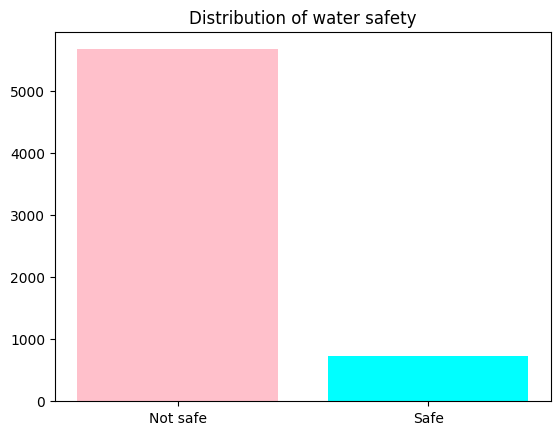

0    5666
1     730
Name: is_safe, dtype: int64
Original train dataset shape Counter({0: 5666, 1: 730})
Resampled  train dataset shape Counter({0: 730, 1: 730})


In [ ]:
# Q5 - balancing the data

waterQuality = pd.Series(y_train_waterQuality).value_counts()
plt.bar(waterQuality.index.map({1: 'Safe', 0: 'Not safe'}), waterQuality.values, color=['pink', 'cyan'])
plt.title('Distribution of water safety')
plt.show()

print((y_train_waterQuality).value_counts())

# balancing the data train - nearMiss
print('Original train dataset shape %s' % Counter(y_train_waterQuality))
nm = NearMiss()
X_train_waterQuality_res, y_train_waterQuality_res = nm.fit_resample(X_train_waterQuality, y_train_waterQuality)
print('Resampled  train dataset shape %s' % Counter(y_train_waterQuality_res))


Q5

לאחר ספירת הערכים בעמודת המטרה ניתן לראות כי הדאטה אינו מאוזן ולכן קיים צורך לאזן את הנתונים.
השיטה שנבחרה היא near-miss(תת דגימה).

שיטה זו מורידה תצפיות מקטגוריית הרוב עד שהיא משווה את מספר התצפיות לקטגוריית המיעוט, בכך בא לידי ביטוי היתרון שלה, כלומר היא שומרת מידע של קטגוריית המיעוט דבר שמפחית את ההשפעה של מעמד הרוב. דבר זה עוזר בשימור מידע ודפוסים בעלי ערך ומשפר את ביצועי המודל במיוחד עבור קטגוריית המיעוט.      
שיטה זו יכולה לעבוד טוב יותר במקרים בהם עובדים עם מערכי נתונים גדולים, כיוון שהיא מצמצמת את גודל הנתונים וכך עשוייה להוביל לזמני אימון מהירים יותר של המודל.

In [ ]:
# Q6 - train two models: Random forest + CatBoost

# a
# using Min Max Scaler to normalize the data train
mms = MinMaxScaler()

X_train_waterQuality_norm = mms.fit_transform(X_train_waterQuality_res)
X_train_waterQuality_norm_df = pd.DataFrame(X_train_waterQuality_norm, columns= X_waterQuality.columns)
print(X_train_waterQuality_norm_df)

# b + c
# Random forest
RF_model = RandomForestClassifier(random_state=123)
param_grid_RF = {'n_estimators':[10, 20, 30, 40, 50], 'max_depth': [6,7,8,9,10]}
grid_RF = GridSearchCV(estimator = RF_model,param_grid = param_grid_RF, refit = True, verbose = 3, n_jobs= -1)

# fitting the model for grid search
grid_RF.fit(X_train_waterQuality_norm_df, y_train_waterQuality_res)

# print best parameter after tuning
print("Random Forest best paramters:", grid_RF.best_params_)


# CatBoost
CB_model = CatBoostClassifier(random_state=123)

# Create the pipeline object
steps=[("scaler", mms), ("classifier", CB_model)]
pipeline = Pipeline(steps)

# Create the hyperparameter space
param_grid_CB = {'classifier__depth': [6,7,8,9,10], 'classifier__iterations': [70,80,100,120,150]}

grid_CB = GridSearchCV(pipeline, param_grid = param_grid_CB, cv = 2, n_jobs= -1)

# fitting the model for grid search
grid_CB.fit(X_train_waterQuality_res, y_train_waterQuality_res)

# print best parameter after tuning
print("CatBoost best paramters:", grid_CB.best_params_)

set_config(display="diagram")
pipeline


      aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0         0.186  0.696980  0.019417  0.713024  0.030769    0.461894  0.797753   
1         0.020  0.806376  0.067961  0.099338  0.384615    0.017321  0.022472   
2         0.008  0.208054  0.058252  0.061810  0.307692    0.068129  0.022472   
3         0.010  0.231544  0.067961  0.037528  0.615385    0.002309  0.033708   
4         0.006  0.353356  0.058252  0.395143  0.076923    0.009238  0.011236   
...         ...       ...       ...       ...       ...         ...       ...   
1455      0.770  0.380201  0.029126  0.068433  0.038462    0.771363  0.707865   
1456      0.582  0.463423  0.029126  0.150110  0.053846    0.584296  0.528090   
1457      0.036  0.136913  0.038835  0.125828  0.046154    0.195150  0.303371   
1458      0.672  0.083893  0.029126  0.695364  0.046154    0.375289  0.966292   
1459      0.006  0.932550  0.087379  0.000000  0.615385    0.008083  0.044944   

        copper  flouride  b

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7c37f174f220>)])

Q6 - d

depth - היפר פרמטר עבור שני המודלים שנבחרו ותפקידו לקבוע את עומק העץ כלומר הוא שולט בגובה העץ וכאשר ערכו גדול עלול להיות אובר-פיטינג.

n_estimators, iterations - היפר פרמטרים עבור כל אחד מהמודלים שנבחרו אשר תפקידם לקבוע את מספר העצים שהמודל יבנה.  


In [ ]:
# Q7 - Neural network

NN_model = Sequential()
NN_model.add(Input(shape=(20,)))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
NN_model.fit(X_train_waterQuality_norm_df, y_train_waterQuality_res, epochs=35, batch_size=33, validation_split=0.2)

# Display the model summary
NN_model.summary()


Epoch 1/35
36/36 [==============================] - 2s 12ms/step - loss: 0.6653 - accuracy: 0.6318 - val_loss: 0.7397 - val_accuracy: 0.4110
Epoch 2/35
36/36 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.7800 - val_loss: 0.6162 - val_accuracy: 0.7432
Epoch 3/35
36/36 [==============================] - 0s 5ms/step - loss: 0.4319 - accuracy: 0.8382 - val_loss: 0.5046 - val_accuracy: 0.8082
Epoch 4/35
36/36 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8527 - val_loss: 0.4197 - val_accuracy: 0.8425
Epoch 5/35
36/36 [==============================] - 0s 6ms/step - loss: 0.3597 - accuracy: 0.8536 - val_loss: 0.4758 - val_accuracy: 0.8185
Epoch 6/35
36/36 [==============================] - 0s 5ms/step - loss: 0.3431 - accuracy: 0.8630 - val_loss: 0.4530 - val_accuracy: 0.8288
Epoch 7/35
36/36 [==============================] - 0s 6ms/step - loss: 0.3399 - accuracy: 0.8622 - val_loss: 0.4331 - val_accuracy: 0.8322
Epoch 8/35
36/36 [=

Q7

לרשת זו יש בסך הכל 3 שכבות פנימיות בנוסף לשכבת הקלט והפלט.

אופי השכבות הוא:
שכבת קלט: טרנספורמציה ליניארית עם 20 תכונות קלט שהם בעצם 20 הפ'יצרים בדאטה.

שכבות פנימיות: טרנספורמציות לא ליניאריות עם פונקציות הפעלה של ReLU, המשמשות לחילוץ תכונות ברמה גבוהה יותר מהקלט.
ובנוסף שכבת dropout: שכבת רגוליזציה להפחתת התאמת יתר.

שכבת פלט: פונקציית הפעלה סיגמואידית לסיווג בינארי.

הרשת מכילה 3457 פרמטרים.

In [ ]:
# 8 - Predictions

# a
# using Min Max Scaler to normalize the data test
X_test_waterQuality_norm = mms.fit_transform(X_test_waterQuality)
X_test_waterQuality_norm_df = pd.DataFrame(X_test_waterQuality_norm, columns= X_waterQuality.columns)
print(X_test_waterQuality_norm_df)

# prediction on the Random Forest:
RF_train_predict = grid_RF.predict(X_train_waterQuality_norm_df)
print("prediction for Random Forest model, Train:")
print(classification_report(RF_train_predict, y_train_waterQuality_res))

RF_test_predict = grid_RF.predict(X_test_waterQuality_norm_df)
print("prediction for Random Forest model, Test:")
print(classification_report(RF_test_predict, y_test_waterQuality))

# prediction on the CatBoost:
CB_train_predict = grid_CB.predict(X_train_waterQuality_res)
print("prediction for CatBoost model, Train:")
print(classification_report(CB_train_predict, y_train_waterQuality_res))

CB_test_predict = grid_CB.predict(X_test_waterQuality)
print("prediction for CatBoost model, Test:")
print(classification_report(CB_test_predict, y_test_waterQuality))

# prediction on the Neural network:
NN_train_predict = NN_model.predict(X_train_waterQuality_norm_df)
# we use chatGPT to convert each of the categories of the predictor variable to binary: 0 or 1
threshold = 0.5
NN_train_predict_binary = (NN_train_predict > threshold).astype(int)
print("prediction for Neural network, Train:")
print(classification_report(NN_train_predict_binary, y_train_waterQuality_res))

NN_test_predict = NN_model.predict(X_test_waterQuality_norm_df)
# we use chatGPT to convert each of the categories of the predictor variable to binary: 0 or 1
threshold = 0.5
NN_test_predict_binary = (NN_test_predict > threshold).astype(int)
print("prediction for Neural network, Test:")
print(classification_report(NN_test_predict_binary, y_test_waterQuality))

      aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0      0.015842  0.498991  0.368932  0.539877  0.692308    0.193625  0.022222   
1      0.001980  0.143241  0.038835  0.065440  0.615385    0.000000  0.088889   
2      0.085149  0.547747  0.009709  0.705521  0.046154    0.801653  0.055556   
3      0.001980  0.080699  0.000971  0.572597  0.023077    0.338843  0.811111   
4      0.726733  0.074311  0.184466  0.862986  0.307692    0.551358  0.588889   
...         ...       ...       ...       ...       ...         ...       ...   
1595   0.005941  0.540350  0.048544  0.069530  0.307692    0.005903  0.022222   
1596   0.000000  0.600202  0.087379  0.028630  0.307692    0.001181  0.022222   
1597   0.017822  0.258911  0.048544  0.116564  0.007692    0.824085  0.055556   
1598   0.017822  0.878278  0.058252  0.159509  0.384615    0.003542  0.088889   
1599   0.015842  0.359449  0.048544  0.077710  0.230769    0.005903  0.044444   

      copper  flouride  bac

Q8 - b

 המודל הטוב ביותר מבין השלושה הוא רשת הנוירונים.
 ניתן לראות שלפי מדד הדיוק הטריין הוא בעל 89% והטסט הוא בעל 71%.
 מדדים אלו של הטריין והטסט קרובים אחד לשני ביחס למדדים אלו במודלים אחרים ובנוסף ניתן לומר כי אחוזי הדיוק בטריין אינם מאוד גבוהים מה שיכול
להעיד שהסיכוי להתאמת יתר - אוברפיטינג הוא נמוך יותר ממודלים אחרים וכך גם האנדרפיטינג כלומר מדד הדיוק של הטריין יצא אופטימלי ולא נמוך מאוד.
 אחוז הדיוק של הטסט אינו מאוד גבוה אך הוא לא גרוע באופן דרסטי ולכן ניתן לומר כי זהו המודל הטוב ביותר.  

Q8 - c

המדד שבחרתי הוא precision.
משמעות מדד זה הוא כמות התחזיות החיוביות מתוך אלה שהיו בפועל חיוביים כלומר כמה מתוך אלה שהמודל חזה שהם חיוביים היו באמת חיוביים.
לפי מדד זה המודל הטוב ביותר הוא catBoost.
מודל זה שומר על המדד הנבחר גבוה עבור שתי הקטגוריות מה שמצביע על מעט.תחזיות חיוביות שגויות.  
מדד זה יכול להיות רלוונטי לעולם התוכן של הבעיה הספציפית שלנו כיוון שהוא מציע הבנה מפורטת ורחבה יותר של ביצועי המודל במיוחד בדאטה שאינו מאוזן כמו שקיים בבעיית הקלסיפקציה שלנו.

**Part 2 - Regression: continuous variable prediction**

# preprocessing of the data

In [ ]:
# The "healthInsurance" database contain data on people and how much their health insurance cost.
df_insurance = pd.read_csv("healthInsurance.csv")

# spliting the data:
X_reg = df_insurance.drop(columns=['charges']) # Drop the target column to get features
y_reg = df_insurance['charges'] # Select only the target column

# check for missing values:
print(df_insurance.isnull().sum())

# there is no missing values.

# turning categoricals values into numaric:
X_reg= pd.get_dummies(df_insurance, columns = ['region'])
X_reg['sex'] = X_reg['sex'].map({'male': 1, 'female': 0})
X_reg['smoker'] = X_reg['smoker'].map({'yes': 1, 'no': 0})

#  we check if there any abnormal data (such as '-1' in the age colunm which can be an error ).
X_reg.describe()

# there are no invalid data, like we can see in the consol.

# using Min Max Scaler to normalize the 3 diffrent data frame.
mms = MinMaxScaler()

# normalize for IterativeImputer
X_reg_norm= mms.fit_transform(X_reg)
X_reg_norm = pd.DataFrame(X_reg_norm, columns=X_reg.columns)

print("after the normalization: /n")
print(X_reg_norm)
print (y_reg)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
after the normalization: /n
           age  sex       bmi  children  smoker   charges  region_northeast  \
0     0.021739  0.0  0.321227       0.0     1.0  0.251611               0.0   
1     0.000000  1.0  0.479150       0.2     0.0  0.009636               0.0   
2     0.217391  1.0  0.458434       0.6     0.0  0.053115               0.0   
3     0.326087  1.0  0.181464       0.0     0.0  0.333010               0.0   
4     0.304348  1.0  0.347592       0.0     0.0  0.043816               0.0   
...        ...  ...       ...       ...     ...       ...               ...   
1333  0.695652  1.0  0.403820       0.6     0.0  0.151299               0.0   
1334  0.000000  0.0  0.429379       0.0     0.0  0.017305               1.0   
1335  0.000000  0.0  0.562012       0.0     0.0  0.008108               0.0   
1336  0.065217  0.0  0.264730       0.0     0.0  0.014144              

In [ ]:
# split the data to test and train
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_reg_norm , y_reg, test_size=0.2, random_state = 123)

print(X_train_lin.shape)
print(X_test_lin.shape)
print(y_train_lin.shape)
print(y_test_lin.shape)

(1070, 10)
(268, 10)
(1070,)
(268,)


# 10+11 - train a model of linear regression and presenting evaluation indices of the models.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)

# model evaluation for test set
y_pred_lin = lin_model.predict(X_test_lin)
Lin_r2=r2_score(y_test_lin, y_pred_lin)
RMSE = (np.sqrt(mean_squared_error(y_test_lin, y_pred_lin)))
MAE= mean_absolute_error(y_test_lin, y_pred_lin)
MAPE=mean_absolute_percentage_error(y_test_lin, y_pred_lin)

print("The model performance for testing set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2))
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print("\n")

# model evaluation for train set
y_pred_train_lin = lin_model.predict(X_train_lin)
lin_r2_train=r2_score(y_train_lin, y_pred_train_lin)
RMSE_train = (np.sqrt(mean_squared_error(y_train_lin, y_pred_train_lin)))
MAE_train= mean_absolute_error(y_train_lin, y_pred_train_lin)
MAPE_train=mean_absolute_percentage_error(y_train_lin, y_pred_train_lin)

print("The model performance for training set")
print("--------------------------------------")
print('R-squared is {}'.format(lin_r2_train))
print('RMSE is {}'.format(RMSE_train))
print('MAE score is {}'.format(MAE_train))
print('MAPE score is {}'.format(MAPE_train))
print("\n")


The model performance for testing set
--------------------------------------
R-squared is 1.0
RMSE is 4.712753177126519e-11
MAE score is 3.9381459950462486e-11
MAPE score is 5.937646368099644e-13


The model performance for training set
--------------------------------------
R-squared is 1.0
RMSE is 4.6369867754766596e-11
MAE score is 3.857511278213585e-11
MAPE score is 6.807366221330507e-13




#12 Polynomial regression:


In [ ]:
#Polynomial transformation
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_reg_norm)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_reg, test_size = 0.2, random_state=123)

print(X_poly_train.shape)
print(X_poly_test.shape)
print(y_poly_train.shape)
print(y_poly_test.shape)

(1070, 66)
(268, 66)
(1070,)
(268,)


In [ ]:
# for the following code I used Chat GTP to help me write the loop.
# the loop will go through several transformations of polynomial degrees and apply the required models inside the loop

# there are warnings that related to the convergence of the logistic regression model during training, we used the chat GPT to understed the warning and to Ignore them for them to not interapt in the consol
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# becuse our data is big we could only run the loop on 2 and 3 degree. for higher degrees the colub is issuing an error than we don't have enough storage.
degrees_to_test = [2, 3]
alphas = [0.01, 0.1, 1]

best_degree = None
best_alpha_lasso = None
best_alpha_ridge = None
best_mae_lasso = float('inf')
best_mae_ridge = float('inf')

for degree in degrees_to_test:
    X_poly_train_deg = PolynomialFeatures(degree=degree).fit_transform(X_poly_train)
    X_poly_test_deg = PolynomialFeatures(degree=degree).fit_transform(X_poly_test)

    # Train the Lasso model
    lasso_params = {'alpha': alphas}
    lasso_grid_search = GridSearchCV(Lasso(max_iter = 100), lasso_params)
    lasso_grid_search.fit(X_poly_train_deg, y_poly_train)

    # Train the Ridge model
    ridge_params = {'alpha': alphas}
    ridge_grid_search = GridSearchCV(Ridge(max_iter = 100), ridge_params)
    ridge_grid_search.fit(X_poly_train_deg, y_poly_train)

    # Get the best alpha values and best estimators for Lasso and Ridge
    best_alpha_lasso = lasso_grid_search.best_params_['alpha']
    best_lasso_model = lasso_grid_search.best_estimator_

    best_alpha_ridge = ridge_grid_search.best_params_['alpha']
    best_ridge_model = ridge_grid_search.best_estimator_

    # Make predictions using the best Lasso and Ridge models
    y_pred_lasso = best_lasso_model.predict(X_poly_test_deg)
    y_pred_ridge = best_ridge_model.predict(X_poly_test_deg)

    # Calculate the Mean Absolute Error for Lasso and Ridge
    mae_lasso = mean_absolute_error(y_poly_test, y_pred_lasso)
    mae_ridge = mean_absolute_error(y_poly_test, y_pred_ridge)

    # Check if this degree resulted in a better model for Lasso
    if mae_lasso < best_mae_lasso:
        best_mae_lasso = mae_lasso
        best_degree = degree
        best_alpha_lasso = best_alpha_lasso

    # Check if this degree resulted in a better model for Ridge
    if mae_ridge < best_mae_ridge:
        best_mae_ridge = mae_ridge
        best_alpha_ridge = best_alpha_ridge

print("Best Polynomial Degree is {}".format(best_degree))
if best_mae_ridge > best_mae_lasso:
  print("Best Lasso Alpha for Best Degree{}".format(best_alpha_lasso))
  print("Lasso Mean Absolute Error for Best Degree{}".format(best_mae_lasso))
else:
  print("Best Ridge Alpha for Best Degree{}".format(best_alpha_ridge))
  print("Ridge Mean Absolute Error for Best Degree{}".format(best_mae_ridge))

Best Polynomial Degree is 3
Best Ridge Alpha for Best Degree0.01
Ridge Mean Absolute Error for Best Degree15.725388753641553


# 13

כאשר יוצרים משתנים ממעלות גבוהות יוצרים יותר פיצרים, בנוסף במקרים בהם יש פיצר עם ערך גדול מאוד ביחס לשאר הפיצרים - לדוגמה, פיצר שמכיל ערכים בסדר גודל של 10 כאשר הפיצרים האחרים קטנים יותר, ברגע שנעלה בחזקה גבוהה נקבל ערכים קיצונים יותר. זה יכול להשפיע בצורה שלילית על יישום המודל. כדי לפתור את הבעיה אפשר להשתמש ברגולציה להגבלת הפרמטרים במודל. באמצעות הרגולציה, ניתן להגביל את המשקולות הגדולות שהמודל נותן לפיצרים הגדולים יותר, וכך למנוע את יצירת מודל שאינו מאזן טוב את הפרמטרים.

במודל Ridge:

נותנים קנס לפיצר שמקבל משקולת גדולה, כך אפשר למתן את המשקל שפיצר מסוים מקבל והוא יהיה גבוה כל עוד הקנס נמוך מהתרומה.

בניגוד אליו ב- Lasso:

אפשר לכבות פיצרים שהם לא משמעותיים והם לא יבואו לידי ביטוי. בצורה הזאת מקטינים את כמות הפיצרים הנמצאים במודל.

ב"לאסו" כדאי להשתמש כאשר יש הרבה מאוד פיצרים וב"ריג" כדאי להשתמש כאשר רוצים לשלוט במשקולות אך עדיין להביא את הפיצרים לידי ביטוי.

#14


In [ ]:
# model evaluation for test set
y_pred_lasso = best_lasso_model.predict(X_poly_test_deg)
Lin_r2_lasso=r2_score(y_poly_test, y_pred_lasso)
RMSE_lasso = (np.sqrt(mean_squared_error(y_poly_test, y_pred_lasso)))
MAE_lasso= mean_absolute_error(y_poly_test, y_pred_lasso)
MAPE_lasso=mean_absolute_percentage_error(y_poly_test, y_pred_lasso)

print("The model performance for testing set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_lasso))
print('RMSE is {}'.format(RMSE_lasso))
print('MAE score is {}'.format(MAE_lasso))
print('MAPE score is {}'.format(MAPE_lasso))
print("\n")

# model evaluation for train set
y_train_pred_lasso = best_lasso_model.predict(X_poly_train_deg)
Lin_r2_lasso_train=r2_score(y_poly_train, y_train_pred_lasso)
RMSE_lasso_train = (np.sqrt(mean_squared_error(y_poly_train, y_train_pred_lasso)))
MAE_lasso_train= mean_absolute_error(y_poly_train, y_train_pred_lasso)
MAPE_lasso_train=mean_absolute_percentage_error(y_poly_train, y_train_pred_lasso)

print("The model performance for training set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_lasso_train))
print('RMSE is {}'.format(RMSE_lasso_train))
print('MAE score is {}'.format(MAE_lasso_train))
print('MAPE score is {}'.format(MAPE_lasso_train))
print("\n")



The model performance for testing set
--------------------------------------
R-squared is 0.999873148530591
RMSE is 139.26602277414622
MAE score is 53.5741752040744
MAPE score is 0.6053736010549128


The model performance for training set
--------------------------------------
R-squared is 0.999962686847005
RMSE is 73.53484960598685
MAE score is 42.0482971953372
MAPE score is 0.5880309340045564




#15

In [ ]:
# random forest model:
RF_model = RandomForestRegressor(random_state=123, max_depth=8)
RF_model.fit(X_train_lin, y_train_lin)

# Catboostregressor model:
CB_model = CatBoostRegressor(random_state= 123, depth=8)
CB_model.fit(X_train_lin, y_train_lin)


Learning rate set to 0.041383
0:	learn: 11596.3555280	total: 4.35ms	remaining: 4.35s
1:	learn: 11165.4050359	total: 6.95ms	remaining: 3.46s
2:	learn: 10801.6994235	total: 9.29ms	remaining: 3.09s
3:	learn: 10439.5971478	total: 11.6ms	remaining: 2.89s
4:	learn: 10092.9845434	total: 15.1ms	remaining: 3.01s
5:	learn: 9780.8278837	total: 17.5ms	remaining: 2.9s
6:	learn: 9450.2914890	total: 19.7ms	remaining: 2.79s
7:	learn: 9146.9513194	total: 22.1ms	remaining: 2.73s
8:	learn: 8835.9692553	total: 23.2ms	remaining: 2.55s
9:	learn: 8564.4944428	total: 25.4ms	remaining: 2.51s
10:	learn: 8275.8976210	total: 26.5ms	remaining: 2.38s
11:	learn: 8004.5414469	total: 28.9ms	remaining: 2.38s
12:	learn: 7730.8282254	total: 31.4ms	remaining: 2.38s
13:	learn: 7478.7621867	total: 33.7ms	remaining: 2.37s
14:	learn: 7226.8652062	total: 36.1ms	remaining: 2.37s
15:	learn: 6995.0230173	total: 38.4ms	remaining: 2.36s
16:	learn: 6804.2972172	total: 40.6ms	remaining: 2.35s
17:	learn: 6583.9961631	total: 42.9ms	rem

#16

In [ ]:
# For random forest:
# model evaluation for test set
y_pred_RF = RF_model.predict(X_test_lin)
Lin_r2_RF=r2_score(y_test_lin, y_pred_RF)
RMSE_RF = (np.sqrt(mean_squared_error(y_test_lin, y_pred_RF)))
MAE_RF= mean_absolute_error(y_test_lin, y_pred_RF)
MAPE_RF=mean_absolute_percentage_error(y_test_lin, y_pred_RF)
print("The Random Forest model:")
print("performance for testing set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_RF))
print('RMSE is {}'.format(RMSE_RF))
print('MAE score is {}'.format(MAE_RF))
print('MAPE score is {}'.format(MAPE_RF))
print("\n")

# model evaluation for train set
y_pred_RF_train = RF_model.predict(X_train_lin)
Lin_r2_RF_train=r2_score(y_train_lin, y_pred_RF_train)
RMSE_RF_train = (np.sqrt(mean_squared_error(y_train_lin, y_pred_RF_train)))
MAE_RF_train= mean_absolute_error(y_train_lin, y_pred_RF_train)
MAPE_RF_train=mean_absolute_percentage_error(y_train_lin, y_pred_RF_train)

print("performance for training set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_RF_train))
print('RMSE is {}'.format(RMSE_RF_train))
print('MAE score is {}'.format(MAE_RF_train))
print('MAPE score is {}'.format(MAPE_RF_train))
print("\n")

# For Catboostregressor:
# model evaluation for test set
y_pred_CB = CB_model.predict(X_test_lin)
Lin_r2_CB=r2_score(y_test_lin, y_pred_CB)
RMSE_CB = (np.sqrt(mean_squared_error(y_test_lin, y_pred_CB)))
MAE_CB= mean_absolute_error(y_test_lin, y_pred_CB)
MAPE_CB=mean_absolute_percentage_error(y_test_lin, y_pred_CB)
print("The Catboostregressor model:")
print("performance for testing set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_CB))
print('RMSE is {}'.format(RMSE_CB))
print('MAE score is {}'.format(MAE_CB))
print('MAPE score is {}'.format(MAPE_CB))
print("\n")

# model evaluation for train set
y_pred_CB_train = CB_model.predict(X_train_lin)
Lin_r2_CB_train=r2_score(y_train_lin, y_pred_RF_train)
RMSE_CB_train = (np.sqrt(mean_squared_error(y_train_lin, y_pred_RF_train)))
MAE_CB_train= mean_absolute_error(y_train_lin, y_pred_RF_train)
MAPE_CB_train=mean_absolute_percentage_error(y_train_lin, y_pred_RF_train)

print("performance for training set")
print("--------------------------------------")
print('R-squared is {}'.format(Lin_r2_CB_train))
print('RMSE is {}'.format(RMSE_CB_train))
print('MAE score is {}'.format(MAE_CB_train))
print('MAPE score is {}'.format(MAPE_CB_train))
print("\n")


The Random Forest model:
performance for testing set
--------------------------------------
R-squared is 0.9994002604423131
RMSE is 302.8159657792574
MAE score is 53.28936318976637
MAPE score is 0.34783644693840937


performance for training set
--------------------------------------
R-squared is 0.9999410440580276
RMSE is 92.4327822198802
MAE score is 25.340031721706747
MAPE score is 0.25707056321070104


The Catboostregressor model:
performance for testing set
--------------------------------------
R-squared is 0.9955090290346867
RMSE is 828.6431516592951
MAE score is 252.6797693476134
MAPE score is 1.6038675962207587


performance for training set
--------------------------------------
R-squared is 0.9999410440580276
RMSE is 92.4327822198802
MAE score is 25.340031721706747
MAPE score is 0.25707056321070104




# 17

 המודל הטוב ביותר מבין הארבע הוא הרגרסיה הלינארית.
 מדדי השונות בה יצאו מאוד קטנים  בטסט ובטריין.

 ה - RMSE, MAE

 בסדר גודל של e-11

 והMAP

 בסדר גודל של E-13

 זאת השגיאה הכי קטנה מבין כל המודלים.
 אפשר להניח שאין אובר פיט או אנדר פיט כי התוצאות של הטריין וטסט מאוד דומות אחת לשניה בסדרי גודל.




**Part 3 - Image classification using a convolutional neural network**

#18


In [ ]:
!wget https://github.com/adi-bl/cats_vs_dogs/archive/refs/heads/main.zip


--2023-10-26 12:16:08--  https://github.com/adi-bl/cats_vs_dogs/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adi-bl/cats_vs_dogs/zip/refs/heads/main [following]
--2023-10-26 12:16:08--  https://codeload.github.com/adi-bl/cats_vs_dogs/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ]  30.05M  42.8MB/s    in 0.7s    

2023-10-26 12:16:09 (42.8 MB/s) - ‘main.zip’ saved [31506047]



In [ ]:
with zipfile.ZipFile('main.zip', 'r') as zip_ref:
    zip_ref.extractall('main')

base_directory = '/content/main/'
subfolder = 'cats_vs_dogs-main'

full_path = os.path.join(base_directory, subfolder)
contents = os.listdir(full_path)

print(contents)

['dog.zip', 'cat.zip']


In [ ]:
with zipfile.ZipFile('/content/main/cats_vs_dogs-main/cat.zip', 'r') as zip_ref:
    zip_ref.extractall('cat')

In [ ]:
image_dir = '/content/cat'
image_size = (80, 60)  # Resize images to this size

images = []
labels = []

for label in os.listdir(image_dir):
    label_dir = os.path.join(image_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        img = Image.open(image_path).resize(image_size)
        img_array = np.array(img)
        if img_array.shape == (60, 80, 3):  # Check the shape before appending
            images.append(img_array)
            labels.append(label)

# Create the NumPy array after checking
cat_images = np.array(images)
cat_labels = np.array(labels)

cat_images.shape


(499, 60, 80, 3)

In [ ]:
with zipfile.ZipFile('/content/main/cats_vs_dogs-main/dog.zip', 'r') as zip_ref:
    zip_ref.extractall('dog')

In [ ]:
image_dir = '/content/dog'
image_size = (80, 60)  # Resize images to this size

images = []
labels = []

for label in os.listdir(image_dir):
    label_dir = os.path.join(image_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        img = Image.open(image_path).resize(image_size)
        img_array = np.array(img)
        if img_array.shape == (60, 80, 3):  # Check the shape before appending
            images.append(img_array)
            labels.append(label)

# Create the NumPy array after checking
dog_images = np.array(images)
dog_labels = np.array(labels)

dog_images.shape


(504, 60, 80, 3)

In [ ]:
Total_images = np.concatenate((cat_images, dog_images))
Total_images.shape

(1003, 60, 80, 3)

In [ ]:
Total_labels = np.concatenate((cat_labels, dog_labels))
Total_labels.shape

(1003,)

In [ ]:
Total_labels_numeric = LabelEncoder().fit_transform(Total_labels)
Total_labels_numeric # 0 are cats, 1 are dogs

array([0, 0, 0, ..., 1, 1, 1])

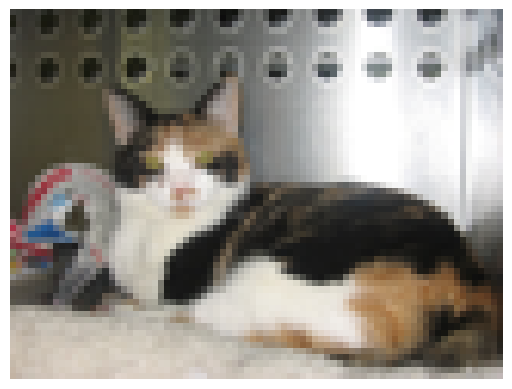

In [ ]:
plt.imshow(cat_images[180])  # For grayscale images
# plt.imshow(image_array)  # For color images
plt.axis('off')  # Turn off axes
plt.show()

# 19 - Neural Network model

In [ ]:
x_train_neural, x_test_neural, y_train_neural, y_test_neural = train_test_split(Total_images,
                                                    Total_labels_numeric,
                                                    test_size = 0.2,
                                                    random_state = 22)
print(x_train_neural.shape)

(802, 60, 80, 3)


In [ ]:
model_NN = keras.Sequential([
    keras.layers.Flatten(input_shape=(60,80,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(3, activation='sigmoid')
])

model_NN.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense_108 (Dense)           (None, 64)                921664    
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_109 (Dense)           (None, 3)                 195       
                                                                 
Total params: 921859 (3.52 MB)
Trainable params: 921859 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_NN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_NN.fit(x_train_neural, y_train_neural, epochs = 15, batch_size = 100)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 1s 20ms/step - loss: 930.0744 - accuracy: 0.4913
Epoch 2/15
9/9 [==============================] - 0s 19ms/step - loss: 78.1341 - accuracy: 0.5000
Epoch 3/15
9/9 [==============================] - 0s 20ms/step - loss: 1.0911 - accuracy: 0.4925
Epoch 4/15
9/9 [==============================] - 0s 19ms/step - loss: 1.0862 - accuracy: 0.4925
Epoch 5/15
9/9 [==============================] - 0s 18ms/step - loss: 1.0812 - accuracy: 0.4925
Epoch 6/15
9/9 [==============================] - 0s 19ms/step - loss: 1.0761 - accuracy: 0.4925
Epoch 7/15
9/9 [==============================] - 0s 17ms/step - loss: 1.0711 - accuracy: 0.4925
Epoch 8/15
9/9 [==============================] - 0s 19ms/step - loss: 1.0661 - accuracy: 0.4925
Epoch 9/15
9/9 [==============================] - 0s 20ms/step - loss: 1.0611 - accuracy: 0.4925
Epoch 10/15
9/9 [==============================] - 0s 19ms/step - loss: 1.0563 - accuracy: 0.4925
Epoch 11/15
9/9 [====================

In [ ]:
# we use the chat to help with the y_pred.

# Make predictions on the training and test sets
y_train_pred_neural = np.argmax(model_NN.predict(x_train_neural), axis=-1)
y_test_pred_neural = np.argmax(model_NN.predict(x_test_neural), axis=-1)

# Generate classification reports
train_classification_report_neural = classification_report(y_train_neural, y_train_pred_neural)
test_classification_report_neural = classification_report(y_test_neural, y_test_pred_neural)

# Print the reports
print("Classification Report for Training Set:\n", train_classification_report_neural)
print("Classification Report for Test Set:\n", test_classification_report_neural)


7/7 [==============================] - 0s 7ms/step
Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67       407
           1       0.00      0.00      0.00       395

    accuracy                           0.51       802
   macro avg       0.25      0.50      0.34       802
weighted avg       0.26      0.51      0.34       802

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.46      1.00      0.63        92
           1       0.00      0.00      0.00       109

    accuracy                           0.46       201
   macro avg       0.23      0.50      0.31       201
weighted avg       0.21      0.46      0.29       201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# 20 - Convolutional Neural Network

In [ ]:
input_shape = (60, 80, 3)

model_CNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ])

model_CNN.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 8, 128)       

In [ ]:
model_CNN.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model_CNN.fit(x_train_neural, y_train_neural, epochs=15, batch_size=50, validation_split=0.1)

# Make predictions on the training and test sets
y_train_pred_cnn = (model_CNN.predict(x_train_neural) > 0.5).astype(int)
y_test_pred_cnn = (model_CNN.predict(x_test_neural) > 0.5).astype(int)

# Generate classification reports
train_classification_report_cnn = classification_report(y_train_neural, y_train_pred_cnn)
test_classification_report_cnn = classification_report(y_test_neural, y_test_pred_cnn)

# Print the reports
print("Classification Report for Training Set:\n", train_classification_report_cnn)
print("Classification Report for Test Set:\n", test_classification_report_cnn)


Epoch 1/15
15/15 [==============================] - 17s 998ms/step - loss: 8.0572 - accuracy: 0.5160 - val_loss: 0.7719 - val_accuracy: 0.4321
Epoch 2/15
15/15 [==============================] - 14s 952ms/step - loss: 0.7076 - accuracy: 0.5284 - val_loss: 0.6796 - val_accuracy: 0.5679
Epoch 3/15
15/15 [==============================] - 9s 612ms/step - loss: 0.6480 - accuracy: 0.6130 - val_loss: 0.7057 - val_accuracy: 0.5432
Epoch 4/15
15/15 [==============================] - 6s 385ms/step - loss: 0.6182 - accuracy: 0.6533 - val_loss: 0.6536 - val_accuracy: 0.5679
Epoch 5/15
15/15 [==============================] - 9s 595ms/step - loss: 0.5742 - accuracy: 0.7046 - val_loss: 0.6790 - val_accuracy: 0.6049
Epoch 6/15
15/15 [==============================] - 9s 623ms/step - loss: 0.5749 - accuracy: 0.6921 - val_loss: 0.7012 - val_accuracy: 0.5679
Epoch 7/15
15/15 [==============================] - 6s 383ms/step - loss: 0.5398 - accuracy: 0.7074 - val_loss: 0.8197 - val_accuracy: 0.5802
Epoc

# 21

תשובה

# 22

רשת נוירונים קונבולוציונית נועדה לחקות את הצורה שבה המוח האנושי מעבד תמונות ומזהה דפוסים בתמונות. הרשת מורכבת מ 3 רכיבים. הרכיב הראשון מטרתו לזהות דפוסים - נגיד אלכסונים ימנים/שמאליים קווים ישרים וכו

השכבה השניה מטרתה למצות את האינפורמציה - להבין איפה היו הכי הרבה אלכסונים מסוג מסוים או הכי הרבה קווים ישרים. ומה הרמה לדוגמא מה הרמת אלכסון

הרכיב השלישי מחבר את השכבות וכך יש שוב את התהליך עד שמתקבלת רשת נוירונים ומידע מאוד עשיר.

רשת נוירונים קונבולוציונית יותר טובה בחיזוי תמונות מפני שהיא יכולה ללמוד ולזהות תכונות פשוטות ומורכבות. הרשת משתמשת בשכבות קונבולוציוניות  חלוקת משקל ואי-ליניאריות כדי ללכוד את היחסים המרחביים בתוך תמונות, מה שהופך אותם מתאימים במיוחד לסיווג תמונות וזיהוי אובייקטים.